# 캐글

In [3]:
import numpy as np
import pandas as pd

import time
import seaborn as sns

In [38]:
train_path = "C:/Users/MEDICI/Documents/MEDICI (22-01-19 ~ 22-06-24)/GitHub/kaggle(digit_recognizer)/train.csv"
test_path = "C:/Users/MEDICI/Documents/MEDICI (22-01-19 ~ 22-06-24)/GitHub/kaggle(digit_recognizer)/test.csv"

In [36]:
train = np.genfromtxt(train_path, delimiter = "," ,skip_header = 1 ).astype(np.dtype("uint8"))

In [37]:
train.shape

(42000, 785)

In [39]:
test = np.genfromtxt(test_path, delimiter = "," ,skip_header = 1 ).astype(np.dtype("uint8"))

In [40]:
test.shape

(28000, 784)

In [ ]:
#모의고사 봉투 문제집을 받았는데 이것을 가지고 모의고사 문제와 모의고사 정답지로 분리

In [67]:
#모의고사 문제만
train_data = train[:, 1:]
#모의고사 정답지만 
train_labels = train[:,0]
#check
print(train_data.shape)
print(train_labels.shape)

(42000, 784)
(42000,)


In [43]:
# 모의고사 정답지의 종류와 분포 체크 ( 종류별로 몇 개 정도)
np.unique(train_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
       dtype=int64))

In [ ]:
# 실제 데이터를 확인해보자 : heatmap

In [44]:
train_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

101번째 이미지 Label: 2


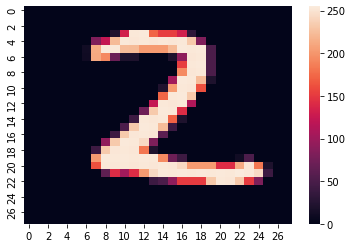

In [70]:
idx = 101
# 1차원을 2차원 28 by 28로
sns.heatmap(np.reshape(train_data[idx], (28,28)))
print("{0}번째 이미지 Label: {1}". format(idx, train_labels[idx]))

In [46]:
# 모델을 대충 한 번 돌려보자 : knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [64]:
# base line check
t1 = time.time()
# step1) 모델 불러오기
knn = KNeighborsClassifier(n_neighbors =5, n_jobs = -1)
#knn_2 = KNeighborsClassifier(n_neighbors =3 ,n_jobs = -1)

# step2) 모의고사 문제/정답지로 학습 : fit
knn.fit(train_data, train_labels)
t2 = time.time()
print("Run Time :", t2 - t1)

Run Time : 0.009725570678710938


In [48]:
# step3) 지금 대충 knn으로 했을 때 실전 풀어보자
pred = knn.predict(test)
pred[:5]

array([2, 0, 9, 9, 3], dtype=uint8)

<AxesSubplot:>

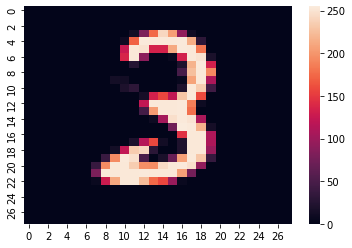

In [51]:
idx = 4
# 1차원을 2차원 28 by 28로
sns.heatmap(np.reshape(test[idx], (28,28)))

In [71]:
pred.shape

(28000,)

In [72]:
#kaggle 제출용 파일 만들기

In [74]:
# 1번에서 28000가지
img_id = []
for i in range(1, len(test)+1, 1):
    img_id.append(i)
    
# 제출용 DF : 제출양식에 맞는 컬럼명과 값들 채우기
pre_MNIST = pd.DataFrame(
    {
        "Imageld" : img_id,
        "Label" : pred
    }
)

# 만든 DF를 외부 csv 파일로 출력
out_path = "C:/Users/MEDICI/Documents/MEDICI (22-01-19 ~ 22-06-24)/GitHub/kaggle(digit_recognizer)/kaggle_mnist_ver1_0.csv"
pre_MNIST.to_csv(out_path, index=False )

In [ ]:
# MinMaxScaler, cv, pca, 적당한 k로 해서 위의 값보다 좋은 값 만들기 

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
# 적용할 모델 불러오기
min_max_sc = MinMaxScaler()
# 주어진 데이터를 기반으로 룰을 잡고, 그 룰대로 반환 : fit_transrom
train_norm = min_max_sc.fit_transform(train_data)
#test_norm = min_max.sc.fit_transform(test_data)
test_norm = min_max_sc.transform(test)

In [75]:
#학습 : 문제지와 정답지 -> 파라미티 최적합(오차 줄이는..)
knn.fit(train_data, train_labels)

#만들어진 모델로 예측 -> 실전 문제 풀어야함
pred = knn.predict(test) # 수능 OMR 정답지

#얼마나 잘 했나 채점 : accuracy 
print(accuracy_score(test, pred))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [76]:
from sklearn.decomposition import PCA

In [77]:
num_comp = 25
pca = PCA(n_components = num_comp)
pca.fit(train_data)

PCA(n_components=25)

In [78]:
np.sum(pca.explained_variance_ratio_)

0.693299018032259

In [79]:
num_comp = 25
pca = PCA(n_components = num_comp)
train_pca = pca.fit_transform(train_data)
test_pca = pca.transform(test)

In [81]:
# 내가 사용할 모델 불러오기 -> 필요한 파라미터 세팅과 모델 
knn = KNeighborsClassifier(n_neighbors = 9, n_jobs = -1)

#학습 : 문제지와 정답지 -> 파라미티 최적합(오차 줄이는..)
knn.fit(train_pca, train_labels)

#만들어진 모델로 예측 -> 실전 문제 풀어야함
pred = knn.predict(test) # 수능 OMR 정답지

#얼마나 잘 했나 채점 : accuracy 
print(accuracy_score(test, pred))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 784 while Y.shape[1] == 25